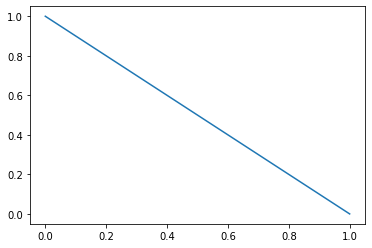

/home/russell/safe2/neuronunit/neuronunit/optimisation/optimization_management.py:8: UserWarning: X11 plotting backend not available, consider installing
  warnings.warn('X11 plotting backend not available, consider installing')


consider installing pynn a heavier backend


INFO       Cache size for target "cython": 4838 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/russell/.cython/brian_extensions" directory. [brian2]


pynn python Error
glif python Error
/home/russell/safe2/neuronunit/neuronunit/tests/multicellular_constraints.p


In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo, inject_and_plot_passive_model
import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC


In [5]:

from neuronunit.optimisation.optimization_management import TSD
from neuronunit.optimisation.optimization_management import OptMan
from neuronunit.optimisation import mint_tests

import os
import pickle
from sciunit import TestSuite
from types import MethodType
from neuronunit.optimisation import model_parameters

"""
def process_tests():
    electro_path = str(os.getcwd())+'/../tests/multicellular_constraints.p'
    print(electro_path)
    os.path.isfile(electro_path)
    assert os.path.isfile(electro_path) == True
    with open(electro_path,'rb') as f:
        test_frame = pickle.load(f)
    filtered_tests = {key:val for key,val in test_frame.items()}
    filtered_tests.keys()

    try:
        assert os.path.isfile(electro_path) == True
        with open(electro_path,'rb') as f:
            test_frame = pickle.load(f)
        filtered_tests = {key:val for key,val in test_frame.items()}
    except:

        filtered_tests = mint_tests.get_cell_constraints()

    tests= test_frame['Neocortex pyramidal cell layer 5-6']
    tests['name'] = 'Neocortex pyramidal cell layer 5-6'
    tt = process_tests()

    #tt = list(tests.values())[0:-1]
    tt = TestSuite(tt)
    TD = TSD(tests)
    #tt.optimize = MethodType(TD.optimize,tt)    
    return tt
"""
def optimize_selection(backend,cell_id= None): 
    #code; 
    NGEN = 8
    MU = 4
    """
    tests= self.test_frame['Hippocampus CA1 pyramidal cell']
    tests['name'] = 'Hippocampus CA1 pyramidal cell'
    a = TestSuite(tests)
    a.optimize = MethodType(optimize,a)
    tests = TSD(tests = tests,use_rheobase_score=True)
    """
    #backend,
    protocol={'allen': False, 'elephant': True}
    param_edges = model_parameters.MODEL_PARAMS[backend]
    tt = process_tests()

    out = tt.optimize(param_edges,MU=5,NGEN=5,free_params=param_edges.keys())
    return out  
    #return optimized_models, passive_vm, spiking_vm, observations, predictions 
out = optimize_selection(str("RAW"))


/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p
/home/russell/safe2/neuronunit/n

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backends = ["RAW", "ADEXP", "HH","BHH"]#"GLIF","NEURON"]
fig, axs = plt.subplots(len(backends)+1,figsize=(40, 40))
cnt=0
for b in backends:
    raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[b].items()}
    pre_model = DataTC()
    if str("V_REST") in raw_attrs.keys():
        raw_attrs["V_REST"] = -75.0
    pre_model.attrs = raw_attrs

    pre_model.backend = b
    

    vm,_ = inject_and_plot_passive_model(raw_attrs,b)
    #axs[cnt].clf()
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_title(b)

    cnt+=1
#fig.show()  

In [ ]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backends = ["RAW", "ADEXP", "HH","BHH"]
fig, axs = plt.subplots(len(backends)+1,figsize=(30, 30))
cnt=0
for b in backends:
    print(b)
    raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[b].items()}
    pre_model = DataTC()
    if str("V_REST") in raw_attrs.keys():
        raw_attrs["V_REST"] = -75.0

    pre_model.attrs = raw_attrs
    pre_model.backend = b
    dtc = dtc_to_rheo(pre_model)
    print(dtc.rheobase)
    
    vm,_ = inject_and_plot_model(raw_attrs,b)
    #vm,_ = inject_and_plot_passive_model(raw_attrs,b)
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_title(b)

    cnt+=1
#fig.show()  
    #inject_and_plot_passive_model(raw_attrs,b)


In [ ]:
import brian2 as b2

b2.A = 1000000000000*b2.pA

In [ ]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backend = "RAW"
raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[backend].items()}


In [ ]:
inject_and_plot_model(raw_attrs,backend)


In [ ]:
pre_model.rheobase

In [ ]:
def precursive_testing(test_frame):
    NGEN = 8
    MU = 4
    

    #place_holder = TSD(tests,use_rheobase_score=True)
    OM = OptMan(ca1,protocol={'elephant':True,'allen':False})
    out = OM.simulated_data_tests(place_holder,backend,model_parameters.MODEL_PARAMS[backend], NGEN=NGEN, MU=MU)
    return out
out = precursive_testing(filtered_tests)